In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels as sm
%matplotlib inline

In [4]:
cars = pd.read_csv('car_purchasing.csv',encoding='latin-1')

In [5]:
cars.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [8]:
features = cars[['gender', 'age', 'annual Salary', 'credit card debt', 'net worth' , 'car purchase amount']]
target = cars['car purchase amount']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.0451592475730015e-21


In [13]:
na_percent = cars.isnull().sum() * 100 / len(cars)
na_percent 

customer name          0.0
customer e-mail        0.0
country                0.0
gender                 0.0
age                    0.0
annual Salary          0.0
credit card debt       0.0
net worth              0.0
car purchase amount    0.0
dtype: float64

In [15]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [16]:
from sklearn.metrics import mean_squared_error, r2_score

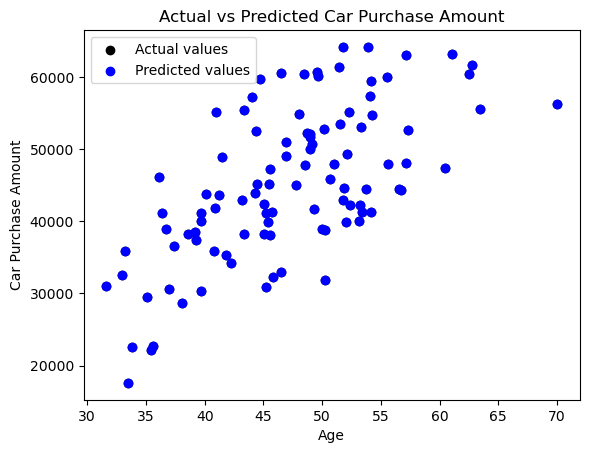

In [17]:
plt.scatter(X_test['age'], y_test, color='black', label='Actual values')
plt.scatter(X_test['age'], y_pred, color='blue', label='Predicted values')
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.legend()
plt.title('Actual vs Predicted Car Purchase Amount')
plt.show()

In [21]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 1.0
